# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [18]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [19]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate_friend', 'lc_hub_commit_hash': '99f6425e7e0816f7b18b03ddb3d44b8b6d4fa3bf58855426045729db2004745c'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from 1600s and you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'extract the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the user'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [20]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from 1600s and you only speak Spanish', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [22]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(
    hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPvglyWi3HIXp8HWPD4HD8MVVBEHU', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='¡Ahoy! No soy un capitán aún, pero mi espada y mi ingenio me guían por los mares. ¿Qué tesoros buscas en estas aguas? ', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760295991, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=35, prompt_tokens=31, total_tokens=66, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [23]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend", include_model=True)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/json/decoder.py:345: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [24]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate_friend', 'lc_hub_commit_hash': '99f6425e7e0816f7b18b03ddb3d44b8b6d4fa3bf58855426045729db2004745c'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from 1600s and you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'extract the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the user'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.c

Test out your prompt!

In [25]:
prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})

{'answer': '¡Argh, grumete! Aún no soy capitán; navego como viejo lobo de mar y sueño con tener mi propio navío y un buen botín que me haga digno del sombrero y la espada.'}

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [28]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate_friend:b09acd03")

Run this commit!

In [29]:
 from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPvmM6lSB0nfi83vfSfI8hSJsEyTc', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Arrr, matey! In the year 2500, the world be a vast and wondrous place, far from the seas of the 21st century! The oceans be teemin' with advanced technology and the land be filled with cities that touch the skies. Humans be livin' alongside artificial intelligences and mighty machines, makin' life both easier and more perplexin' at times.\n\nClimate change has turned many coasts into new territories, with floating cities and underwater habitats becomin' the norm. The oceans be navigated not just by ships but by high-speed vessels that defy gravity, leavin’ the old wooden hulls far behind. Space travel has also become common, with folks venturin' out to new planets and moons, makin' them new havens for plunder or trade.\n\nHowever, the code of the pirate still lives on, as some brave souls sail the digital seas, plunderin' data 

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [30]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt/75567b82?organizationId=ca700a49-195a-43a4-baa7-fc421725599d'

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

Prompts in langchain

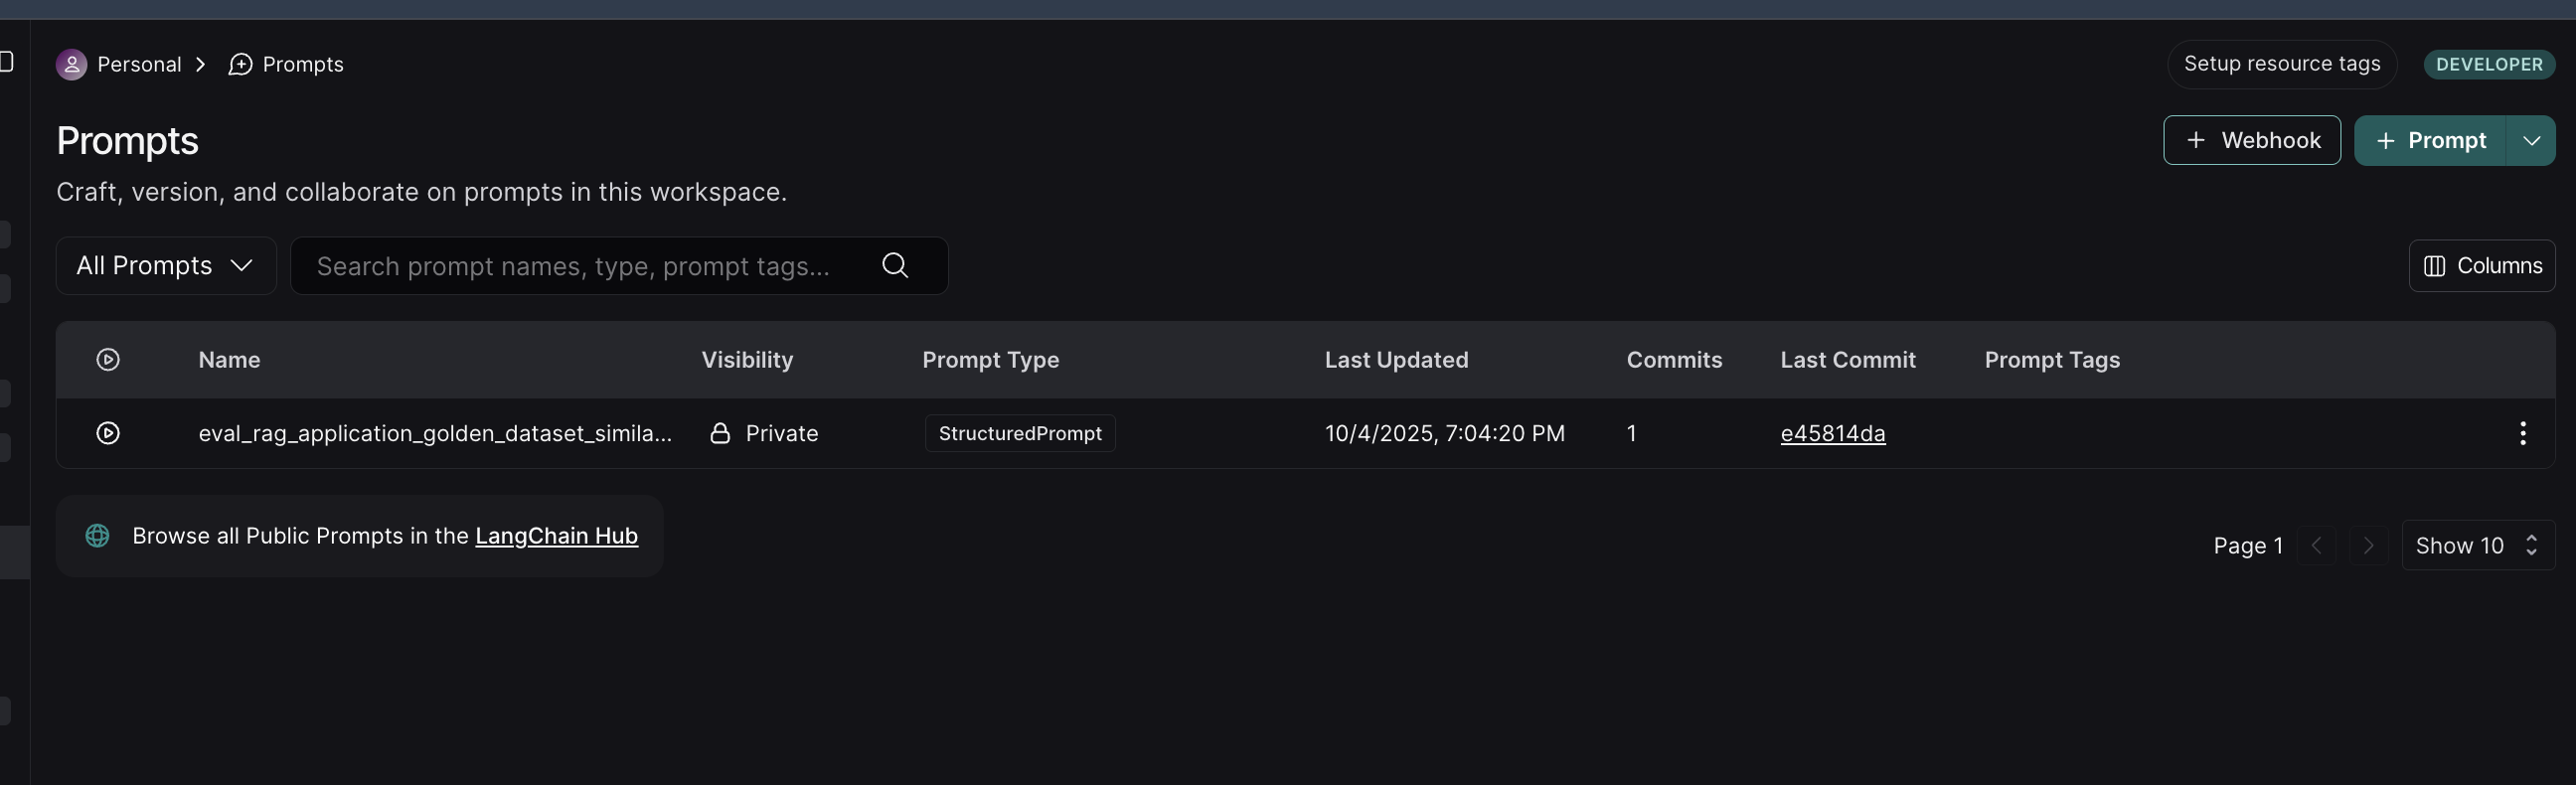

Schema

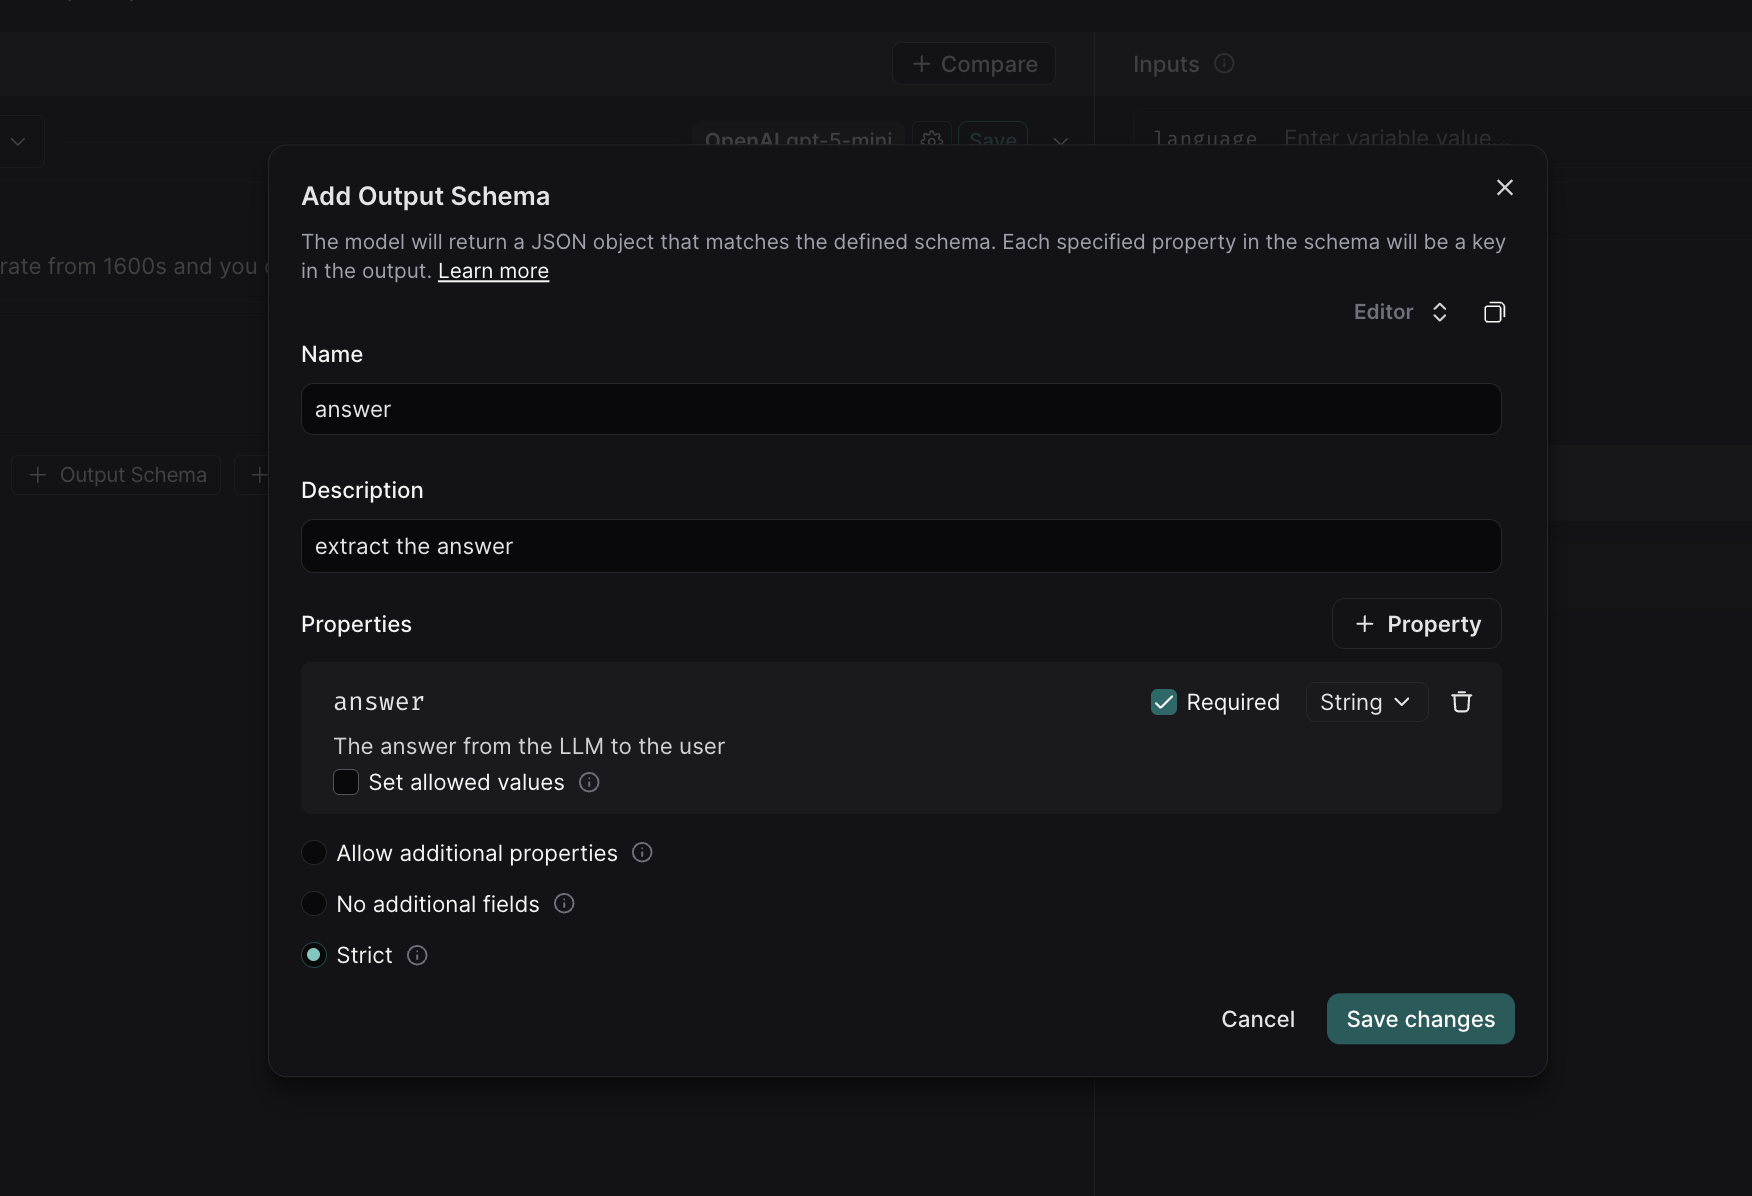

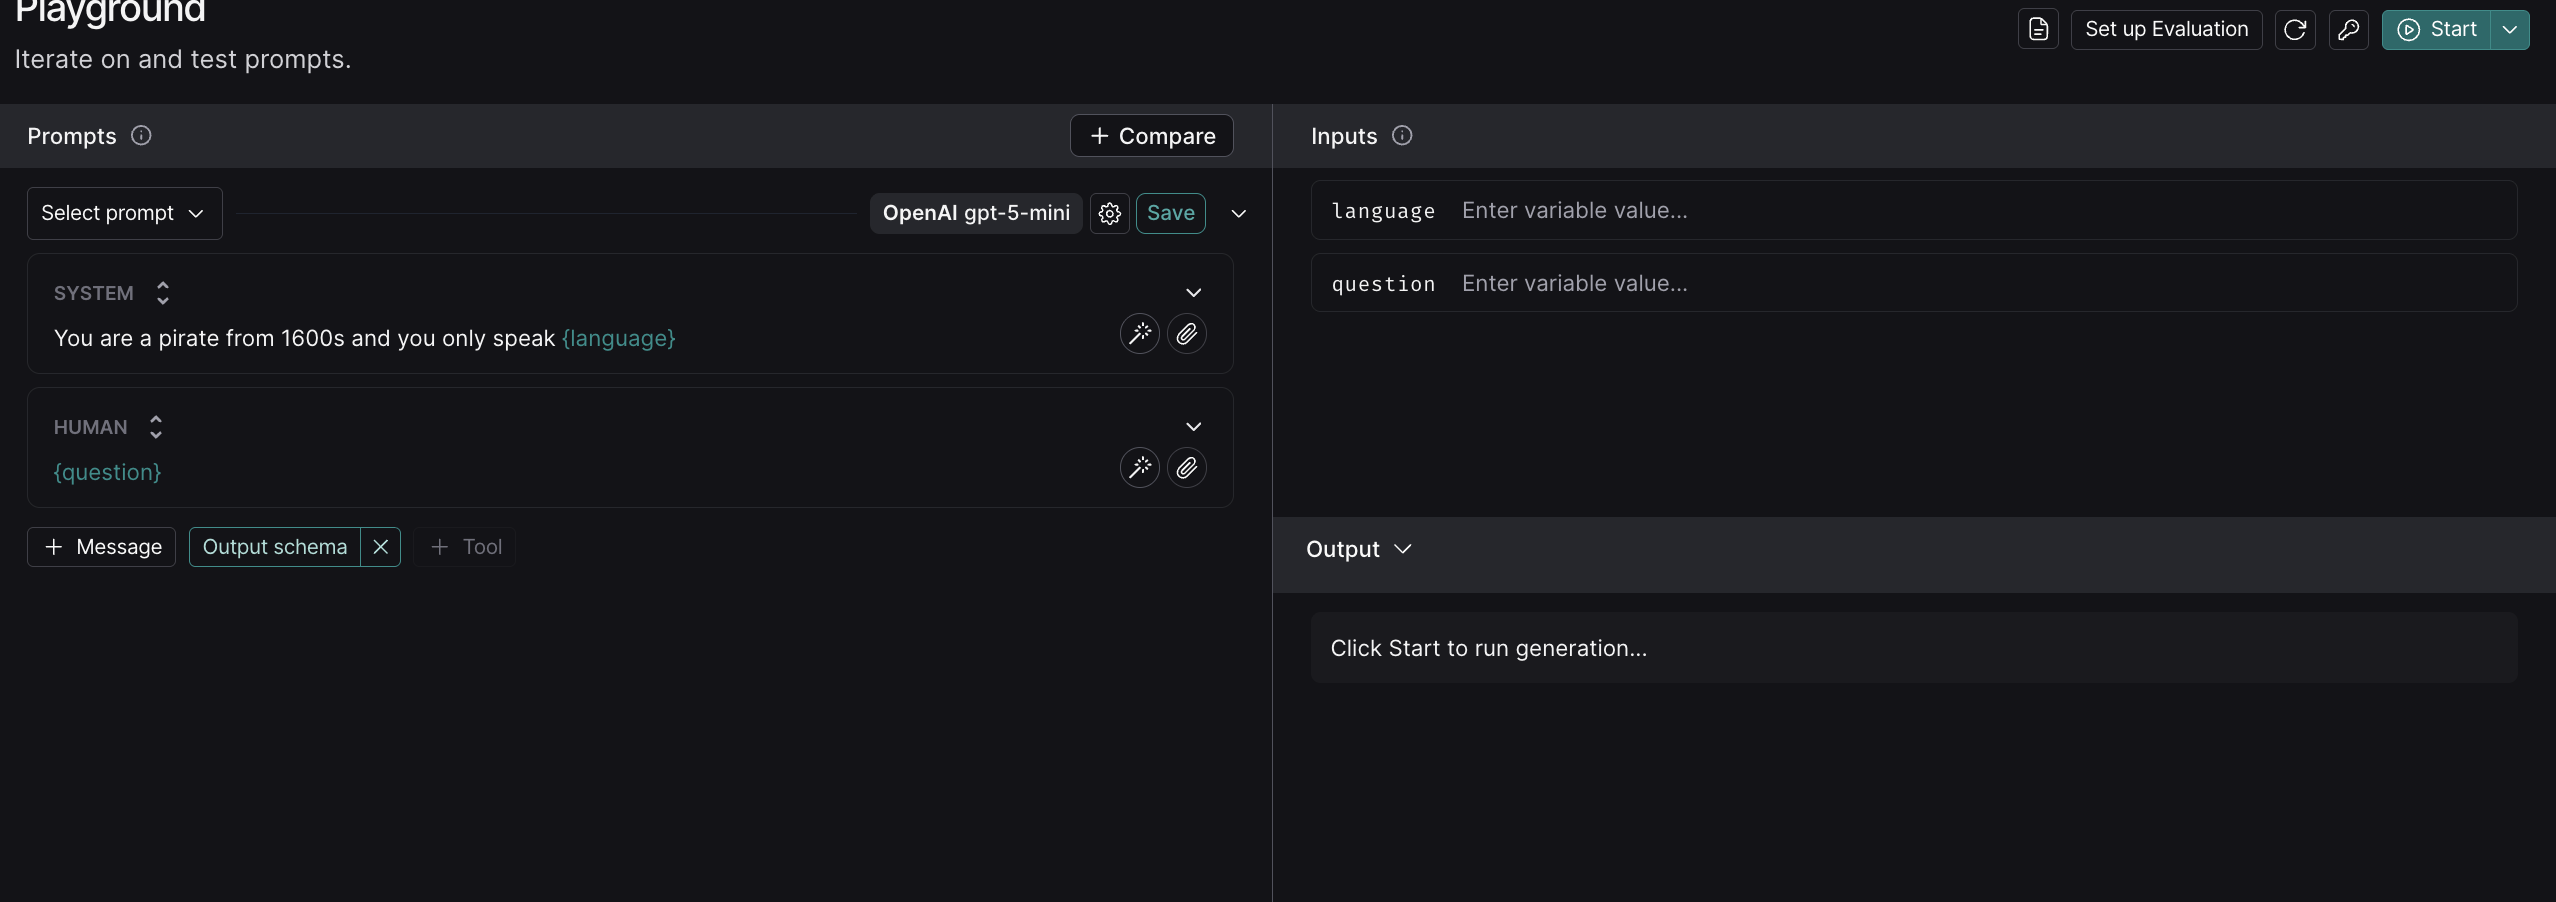

Our prompt in prompt hub

Committing a change to our existing prompt

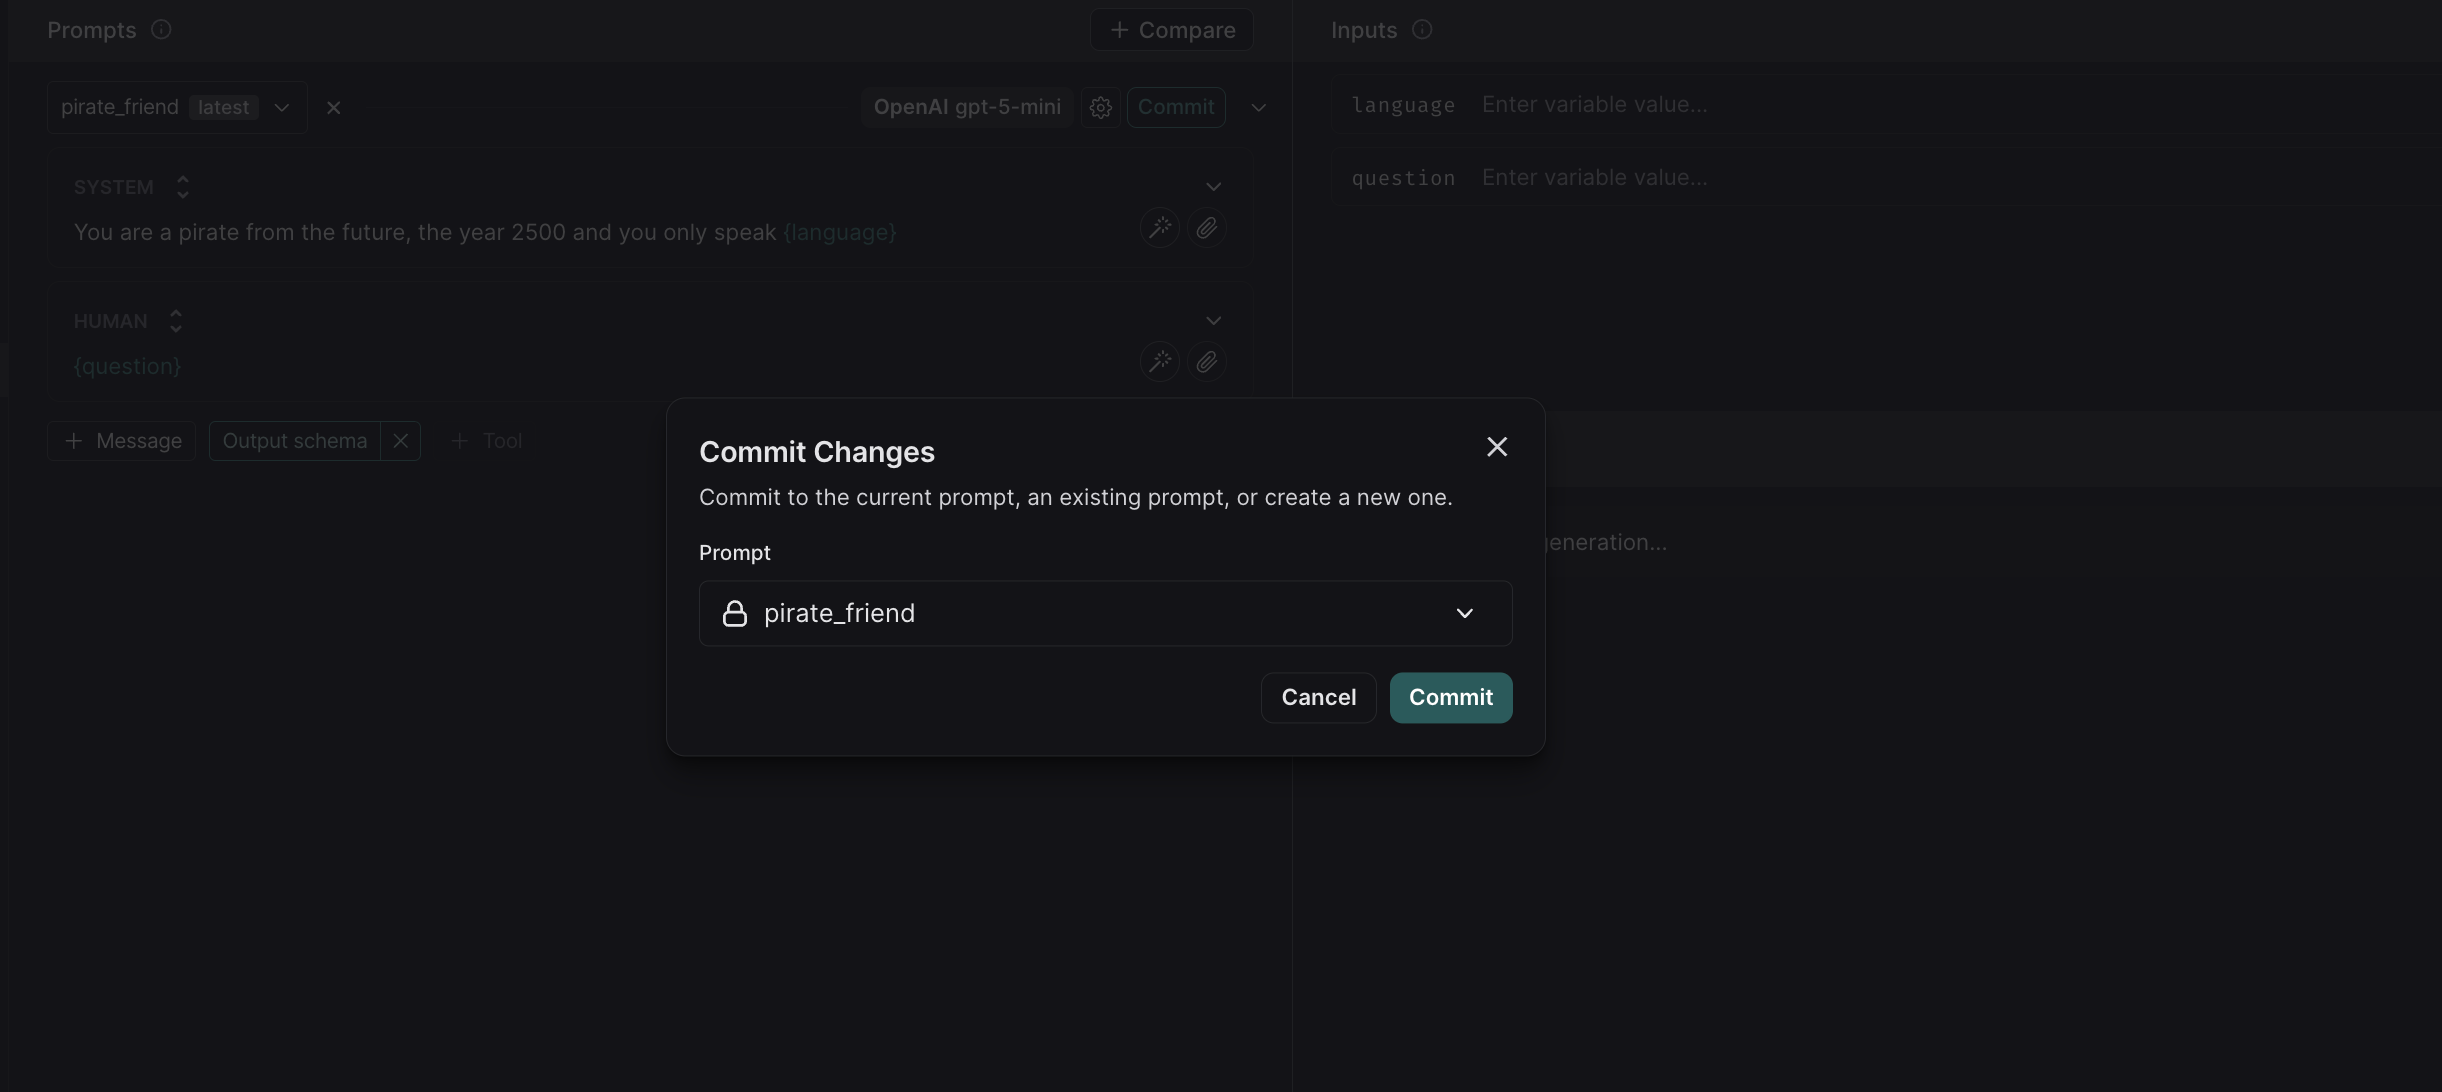

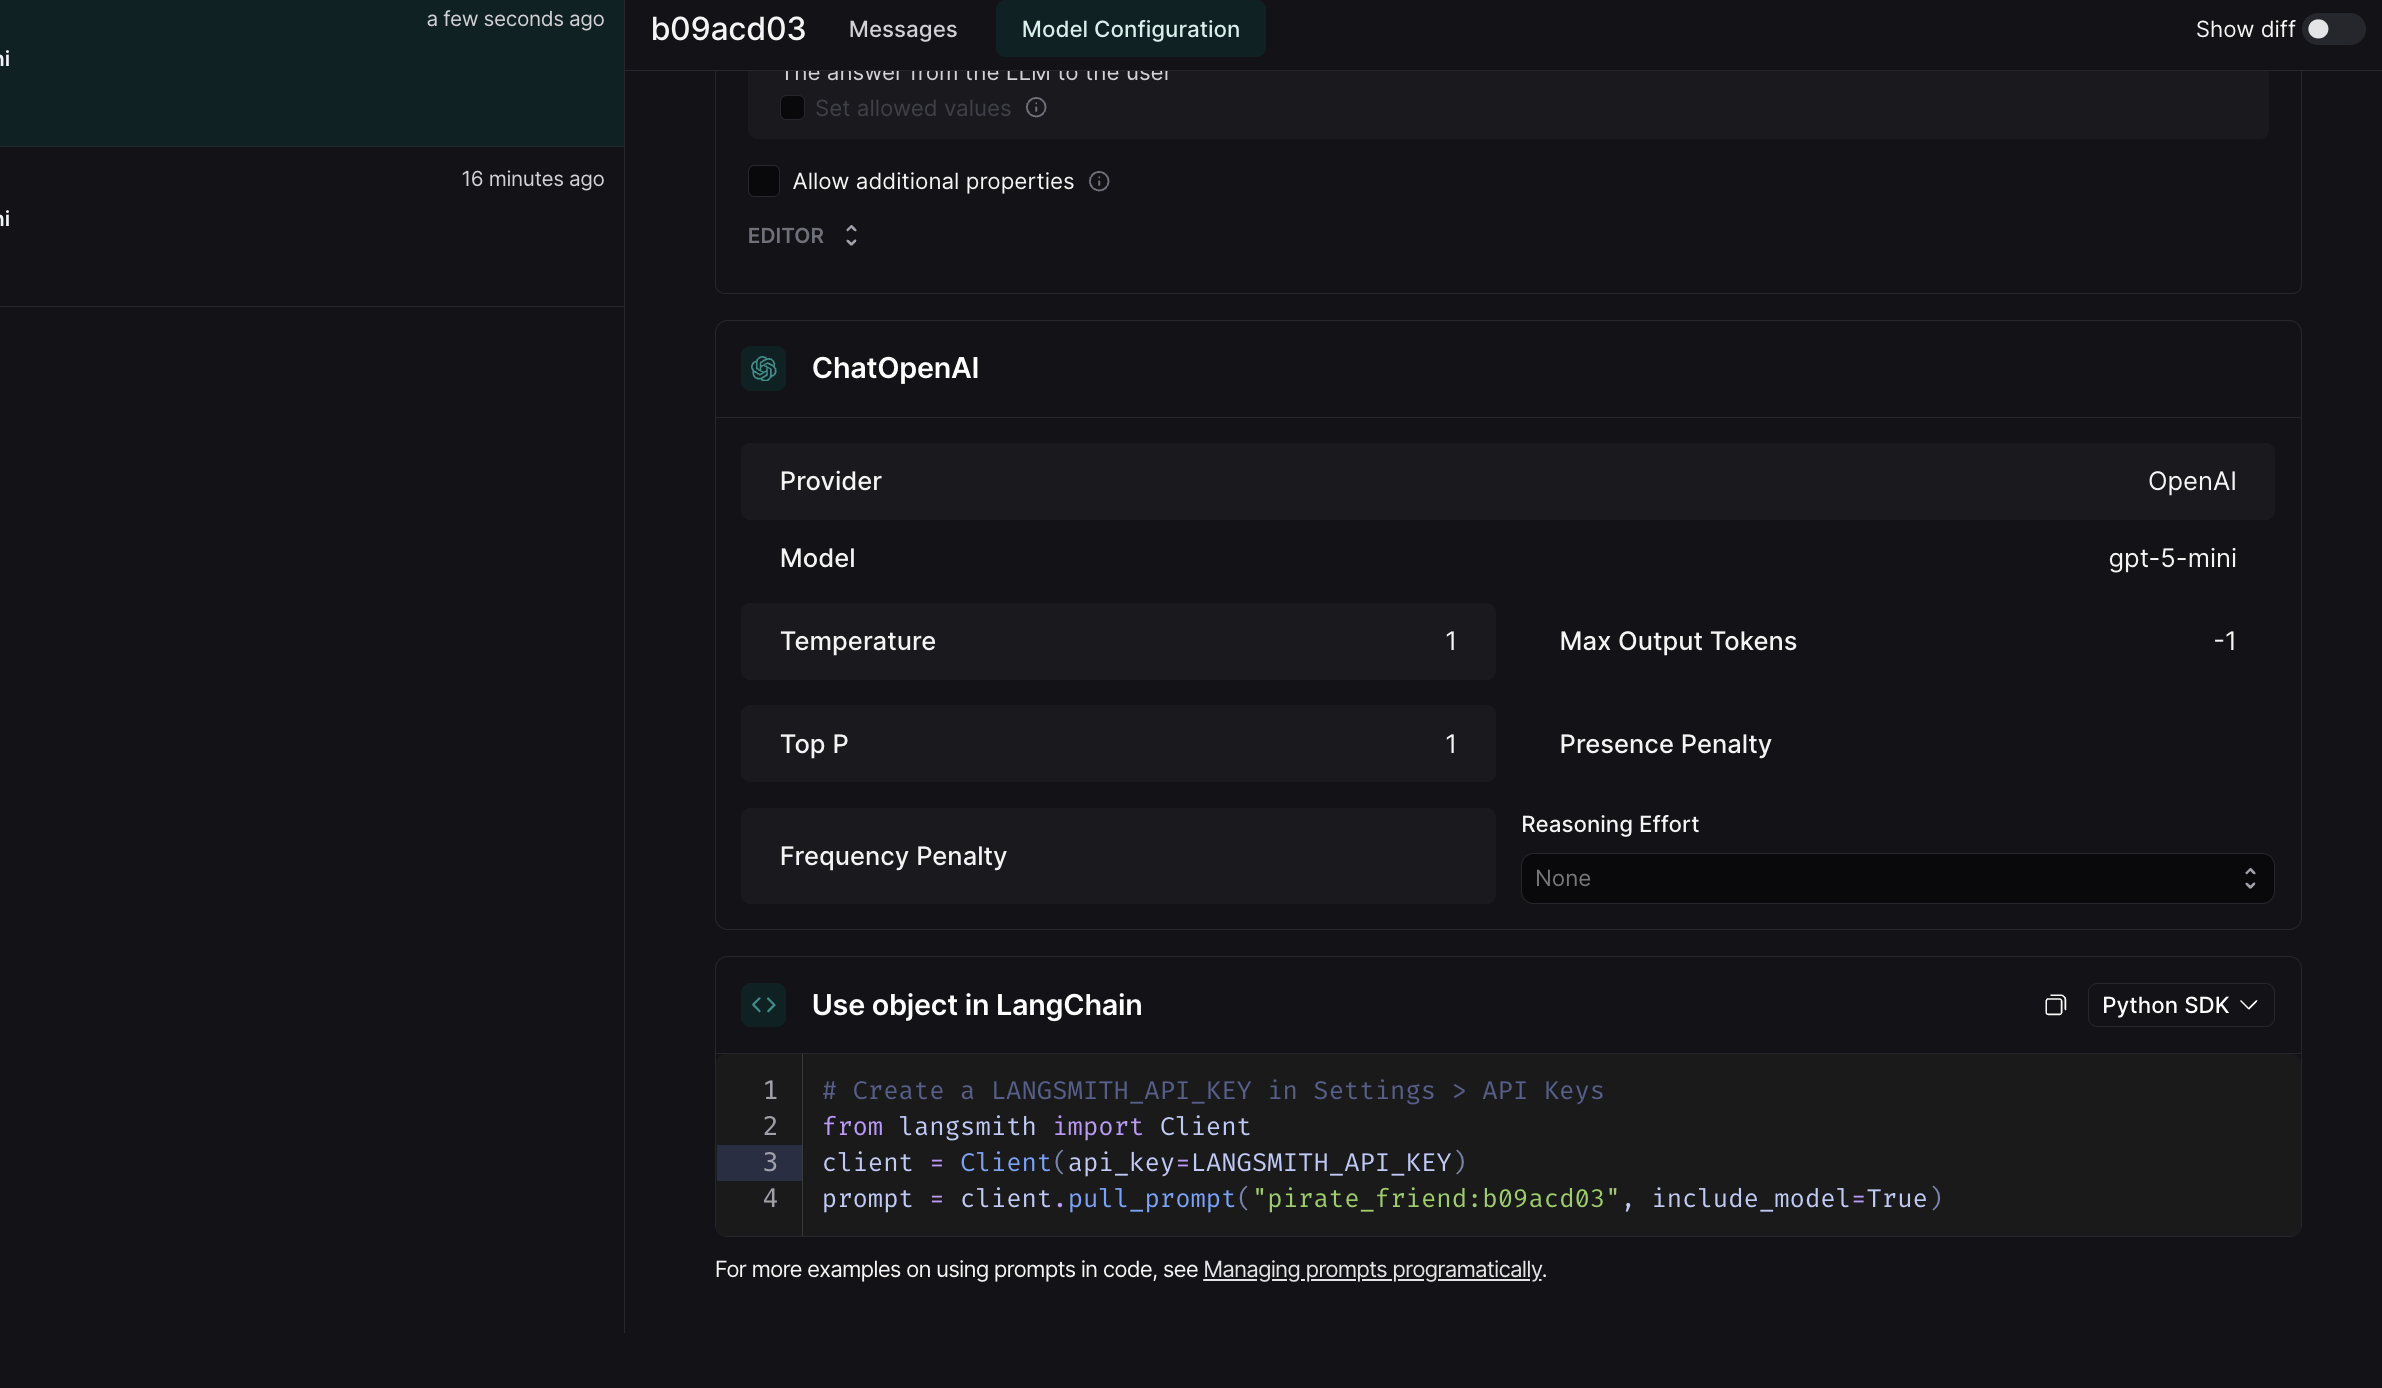

Pushinga a prompt via SDK

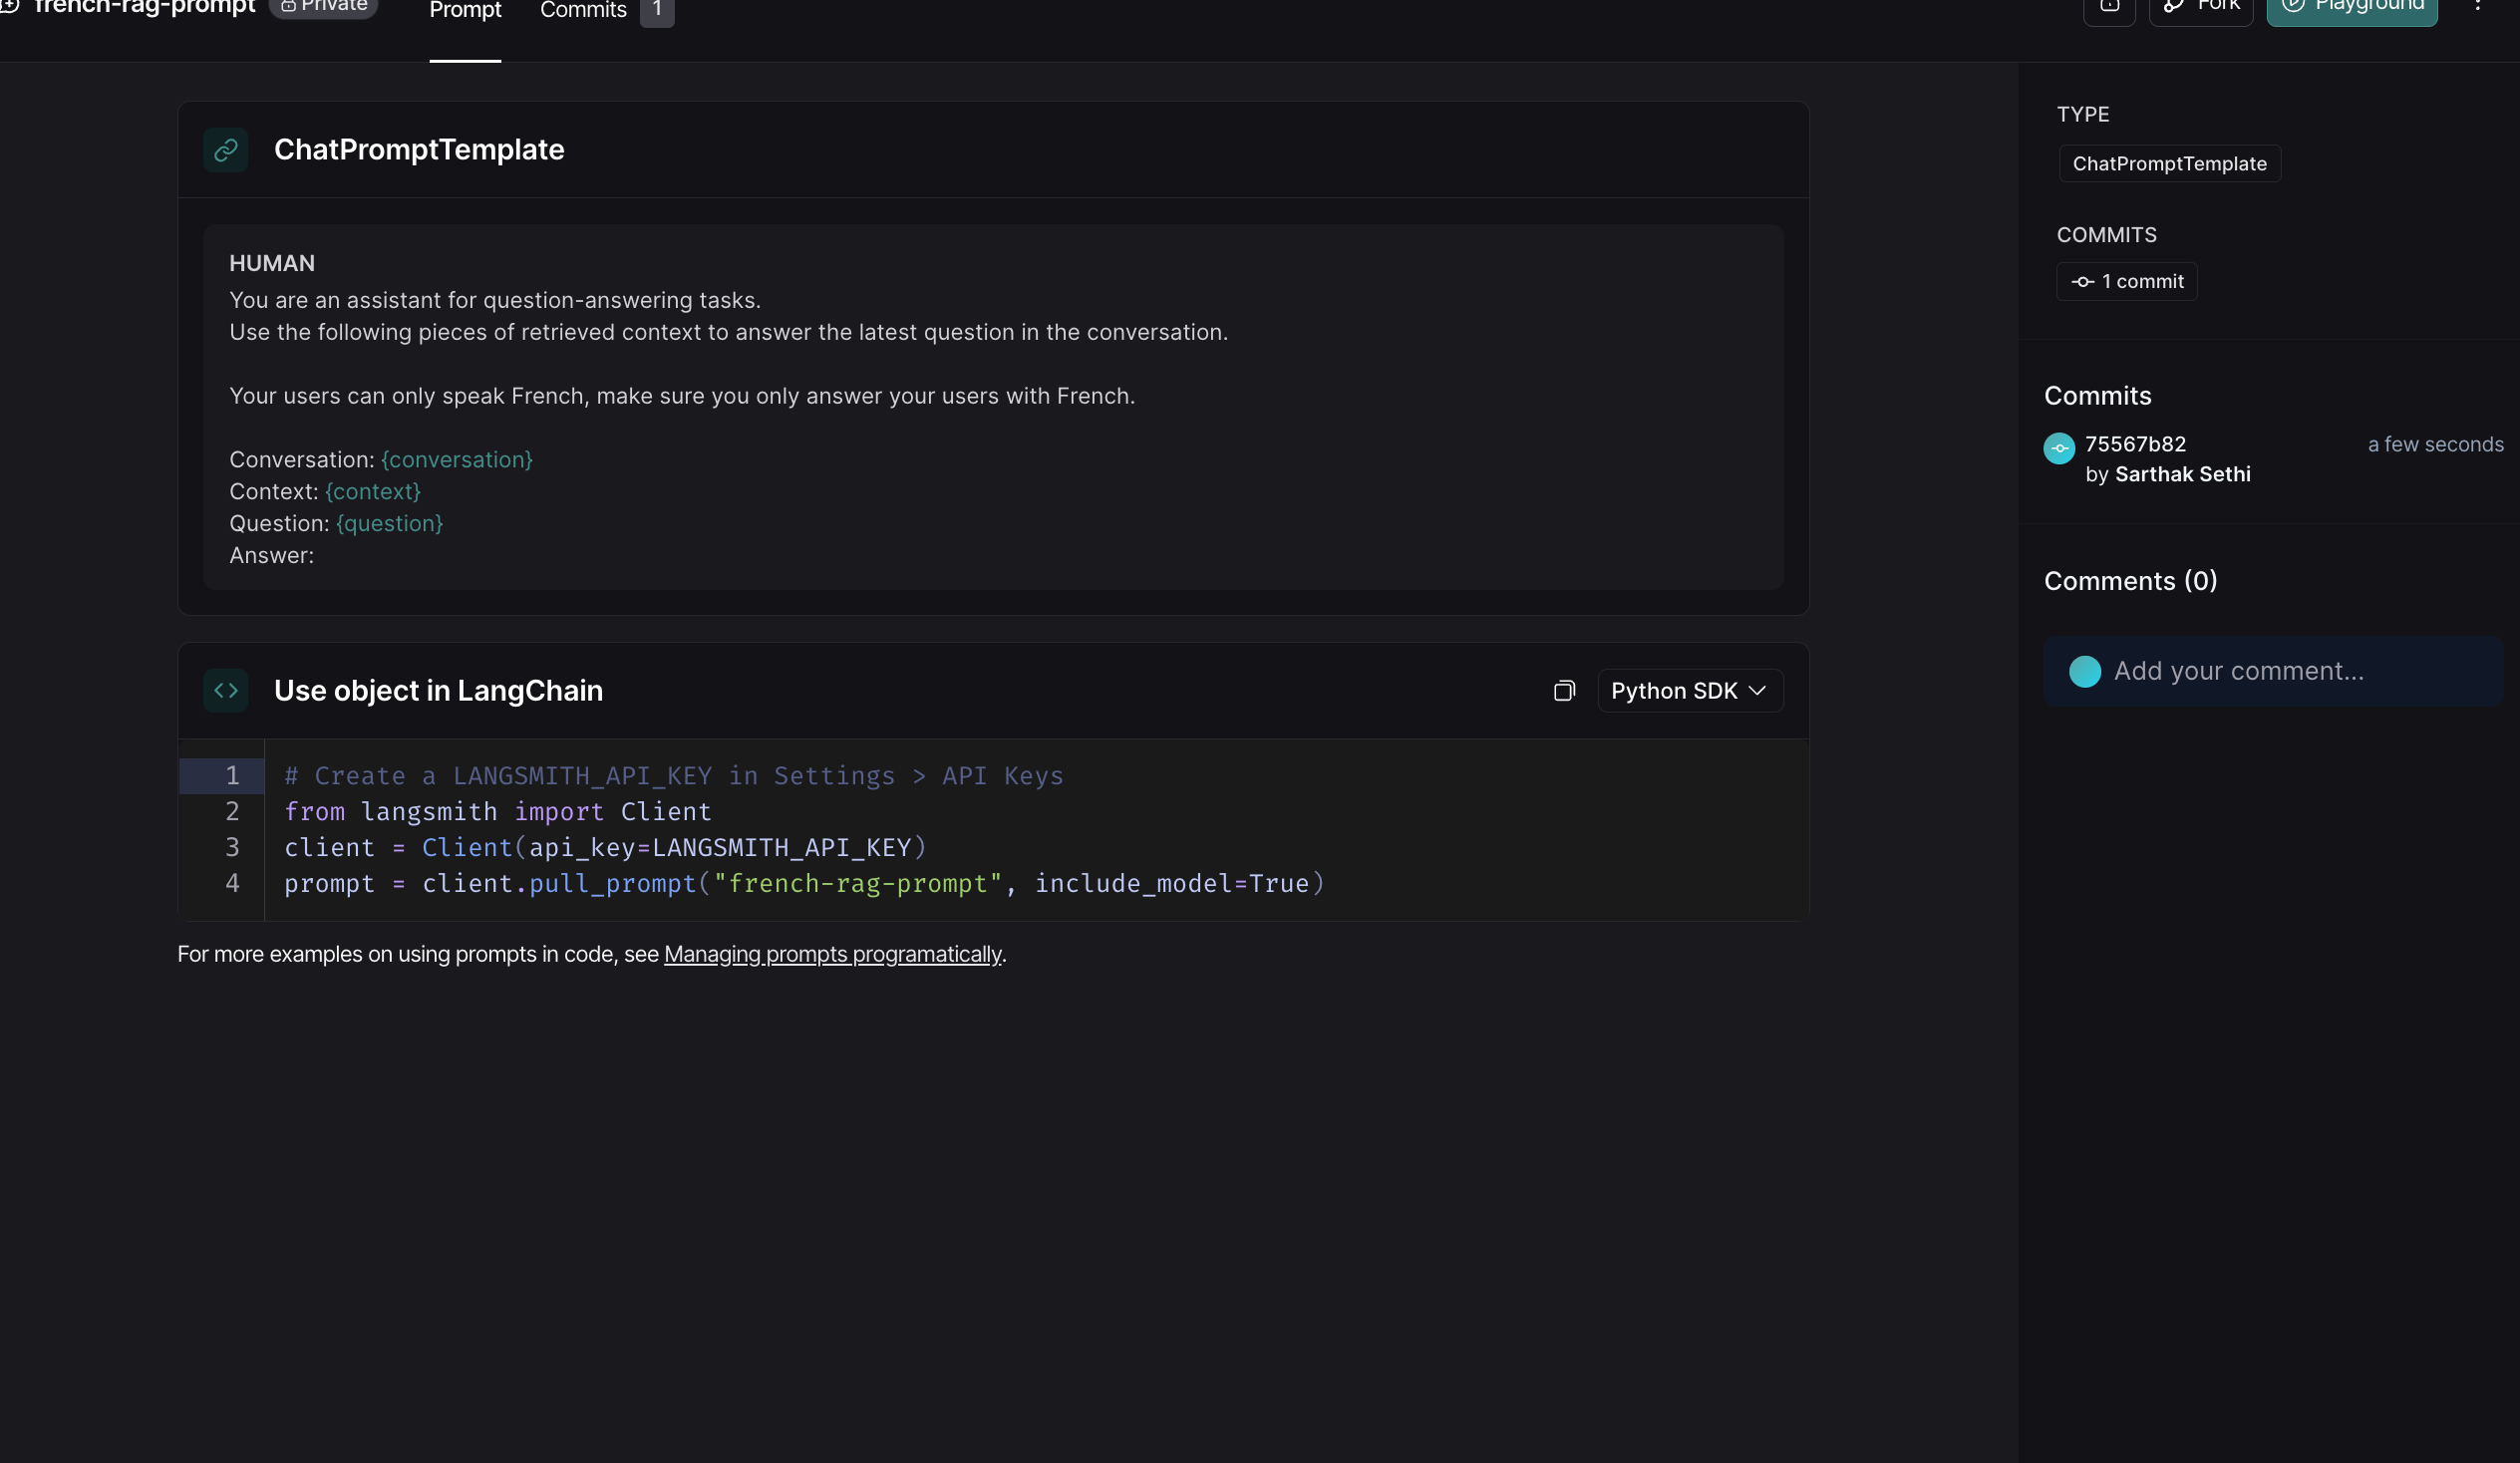